UNLOCKING YOUTUBE CHANNEL PERFORMANCE SECRETS - DATA SCIENCE PROJECT 

NAME:JOLA KESEENA C

OBJECTIVE:TO UNDERSTAND WHICH FACTOR CONTRIBUTE TO CHANNEL REVENUE,SUBSCRIPTION GROWTH,AUDIENCE ENGAGEMENT AND THE GOAL IS TO PREDICT ESTIMATED REVENUE 

LOAD THE DATASET AND INFORMATION ABOUT IT

In [2]:
import pandas as pd
file_path = 'youtube_channel_real_performance_analytics.csv'
df = pd.read_csv(file_path)

In [3]:
print("Dataset Info:")
print(df.info()) 

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 70 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  364 non-null    int64  
 1   Video Duration                      364 non-null    float64
 2   Video Publish Time                  364 non-null    object 
 3   Days Since Publish                  364 non-null    int64  
 4   Day                                 364 non-null    int64  
 5   Month                               364 non-null    int64  
 6   Year                                364 non-null    int64  
 7   Day of Week                         364 non-null    object 
 8   Revenue per 1000 Views (USD)        364 non-null    float64
 9   Monetized Playbacks (Estimate)      364 non-null    float64
 10  Playback-Based CPM (USD)            364 non-null    float64
 11  CPM (USD)                      

In [4]:
print("\n First 5 Rows:")
print(df.head())         


 First 5 Rows:
   ID  Video Duration   Video Publish Time  Days Since Publish  Day  Month  \
0   0           201.0  2016-06-02 00:00:00                   0    2      6   
1   1           391.0  2016-06-10 00:00:00                   8   10      6   
2   2           133.0  2016-06-14 00:00:00                   4   14      6   
3   3            14.0  2016-06-29 00:00:00                  15   29      6   
4   4            45.0  2016-07-01 00:00:00                   2    1      7   

   Year Day of Week  Revenue per 1000 Views (USD)  \
0  2016    Thursday                         0.024   
1  2016      Friday                         0.056   
2  2016     Tuesday                         0.014   
3  2016   Wednesday                         0.004   
4  2016      Friday                         0.000   

   Monetized Playbacks (Estimate)  ...  Watched (Not Skipped) (%)  \
0                           723.0  ...                        0.0   
1                           727.0  ...                    

In [5]:
print("\n Column Names:")
print(df.columns.tolist()) 


 Column Names:
['ID', 'Video Duration', 'Video Publish Time', 'Days Since Publish', 'Day', 'Month', 'Year', 'Day of Week', 'Revenue per 1000 Views (USD)', 'Monetized Playbacks (Estimate)', 'Playback-Based CPM (USD)', 'CPM (USD)', 'Ad Impressions', 'Estimated AdSense Revenue (USD)', 'DoubleClick Revenue (USD)', 'YouTube Ads Revenue (USD)', 'Watch Page Ads Revenue (USD)', 'YouTube\xa0Premium (USD)', 'Transaction Revenue (USD)', 'Transactions', 'Revenue from Transactions (USD)', 'Reactions', 'Chat Messages Count', 'Reminders Set', 'Stream Hours', 'Remix Views', 'Remix Count', 'Subscribers from Posts', 'New Comments', 'Shares', 'Like Rate (%)', 'Dislikes', 'Likes', 'Unsubscribes', 'New Subscribers', 'Returned Items (USD)', 'Unconfirmed Commissions (USD)', 'Approved Commissions (USD)', 'Orders', 'Total Sales Volume (USD)', 'End Screen Click-Through Rate (%)', 'End Screen Impressions', 'End Screen Clicks', 'Teaser Click-Through Rate (%)', 'Teaser Impressions', 'Teaser Clicks', 'Card Click-T

In [6]:
print("\nDataset Shape (rows, columns):")
print(df.shape)         



Dataset Shape (rows, columns):
(364, 70)


In [7]:
print("\n Summary Statistics:")
print(df.describe(include='all'))


 Summary Statistics:
                ID  Video Duration   Video Publish Time  Days Since Publish  \
count   364.000000      364.000000                  364          364.000000   
unique         NaN             NaN                  357                 NaN   
top            NaN             NaN  2023-12-26 00:00:00                 NaN   
freq           NaN             NaN                    2                 NaN   
mean    181.500000      664.239011                  NaN            8.406593   
std     105.221988      330.646183                  NaN           15.371239   
min       0.000000        9.000000                  NaN            0.000000   
25%      90.750000      496.000000                  NaN            3.000000   
50%     181.500000      613.000000                  NaN            5.000000   
75%     272.250000      786.500000                  NaN            9.000000   
max     363.000000     2311.000000                  NaN          260.000000   

               Day       Mont

DATA CLEANING

In [8]:
print("\n Missing Values:")
print(df.isnull().sum()) 


 Missing Values:
ID                         0
Video Duration             0
Video Publish Time         0
Days Since Publish         0
Day                        0
                          ..
Watch Time (hours)         0
Subscribers                0
Estimated Revenue (USD)    0
Impressions                0
Video Thumbnail CTR (%)    0
Length: 70, dtype: int64


In [9]:
total_zeros = (df == 0).sum()
print(total_zeros)

ID                          1
Video Duration              0
Video Publish Time          0
Days Since Publish          8
Day                         0
                           ..
Watch Time (hours)          0
Subscribers                 2
Estimated Revenue (USD)    30
Impressions                 0
Video Thumbnail CTR (%)     0
Length: 70, dtype: int64


In [10]:
# Manually replace zeros with NaN 
import numpy as np
cols_with_zeros = ['ID', 'Days Since Publish', 'Subscribers', 'Estimated Revenue (USD)']
df[cols_with_zeros] = df[cols_with_zeros].replace(0, np.nan)


In [11]:
print(df.isnull().sum()) 

ID                          1
Video Duration              0
Video Publish Time          0
Days Since Publish          8
Day                         0
                           ..
Watch Time (hours)          0
Subscribers                 2
Estimated Revenue (USD)    30
Impressions                 0
Video Thumbnail CTR (%)     0
Length: 70, dtype: int64


FILLING AND DROPPING NAN

In [12]:
#Before drop
df.shape

(364, 70)

In [13]:
import numpy as np


df.fillna({
    'Days Since Publish': df['Days Since Publish'].median(),
    'Subscribers': df['Subscribers'].median(),
    'Estimated Revenue (USD)': df['Estimated Revenue (USD)'].median()
}, inplace=True)


# For ID,  drop that 1 row
df.dropna(subset=['ID'], inplace=True)  # only drops the row where ID is NaN


In [14]:
df.shape

(363, 70)

In [15]:
df['Video Publish Time'] = pd.to_datetime(df['Video Publish Time'])


EXPLORATORY DATA ANALYSIS

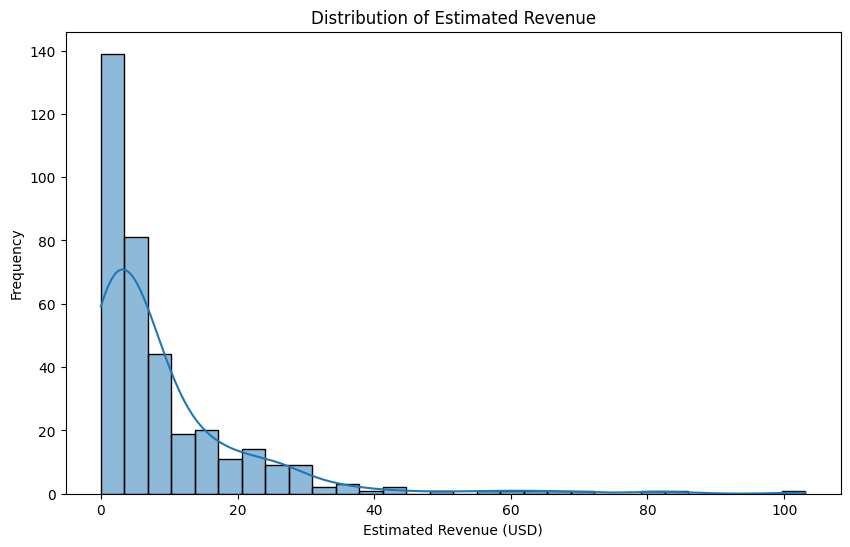

In [16]:
#eda
import  matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(df['Estimated Revenue (USD)'], bins=30, kde=True)
plt.title('Distribution of Estimated Revenue')
plt.xlabel('Estimated Revenue (USD)')
plt.ylabel('Frequency')
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_13988\829678899.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Estimated Revenue (USD)', y='ID', data=top_revenue, palette='viridis')


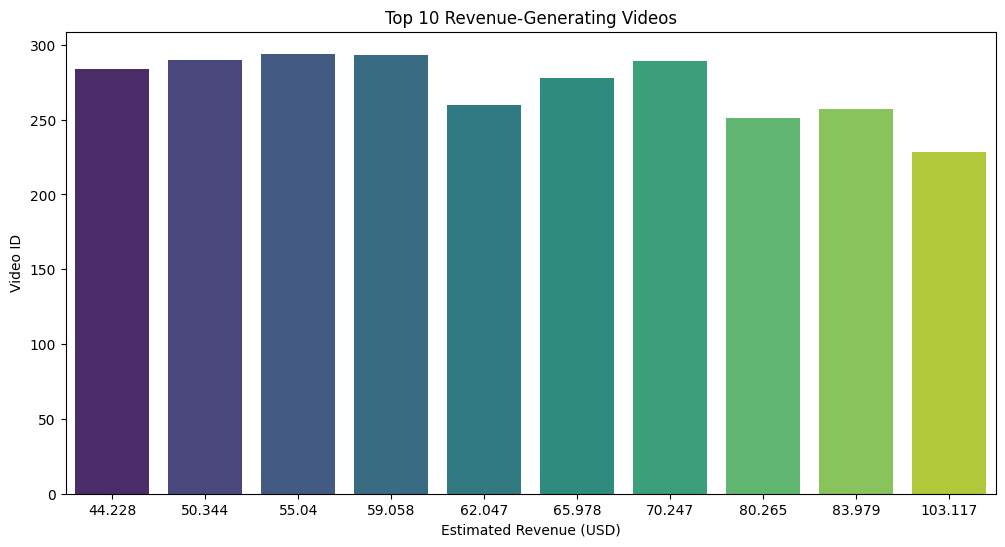

In [17]:
top_revenue = df.sort_values(by='Estimated Revenue (USD)', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x='Estimated Revenue (USD)', y='ID', data=top_revenue, palette='viridis')
plt.title("Top 10 Revenue-Generating Videos")
plt.xlabel("Estimated Revenue (USD)")
plt.ylabel("Video ID")
plt.show()


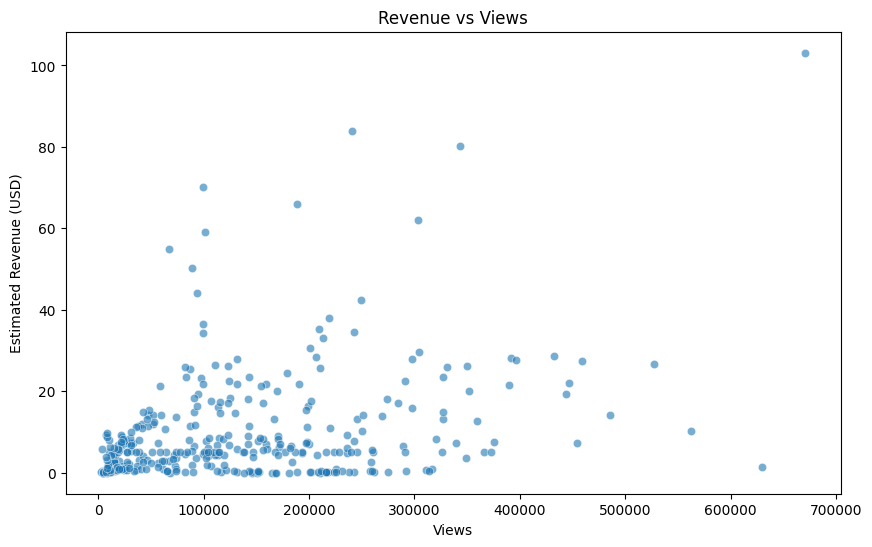

In [18]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Views', y='Estimated Revenue (USD)', data=df, alpha=0.6)
plt.title("Revenue vs Views")
plt.xlabel("Views")
plt.ylabel("Estimated Revenue (USD)")
plt.show()


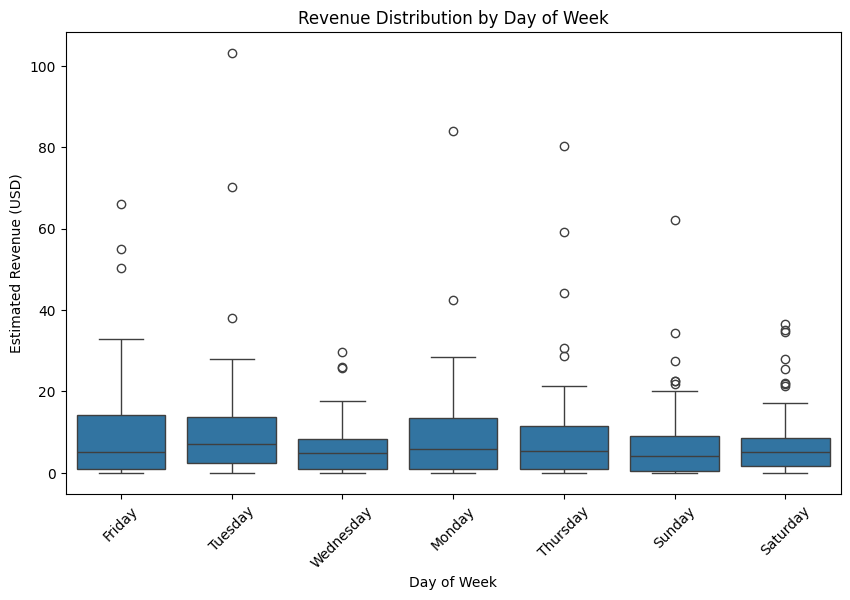

In [19]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Day of Week', y='Estimated Revenue (USD)', data=df)
plt.title("Revenue Distribution by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Estimated Revenue (USD)")
plt.xticks(rotation=45)
plt.show()


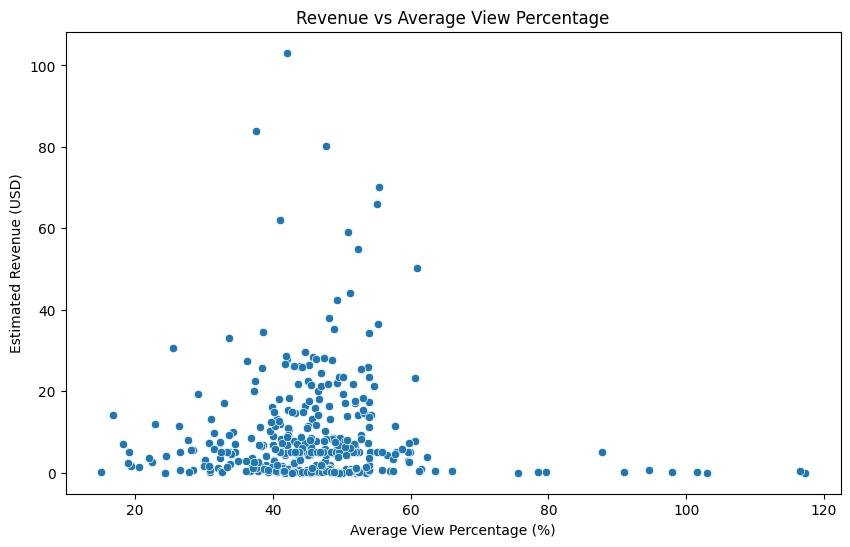

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Average View Percentage (%)', y='Estimated Revenue (USD)', data=df)
plt.title("Revenue vs Average View Percentage")
plt.xlabel("Average View Percentage (%)")
plt.ylabel("Estimated Revenue (USD)")
plt.show()




FEATURE ENGINEERING

In [21]:
# Handle division by zero and missing values safely
df['Revenue per View'] = df['Estimated Revenue (USD)'] / df['Views']
df['Revenue per View'] = df['Revenue per View'].replace([np.inf, -np.inf], np.nan).fillna(0)


In [22]:
df['Engagement Rate'] = (df['Likes'] + df['Shares'] + df['New Comments']) / df['Views'] * 100
df['Engagement Rate'] = df['Engagement Rate'].replace([np.inf, -np.inf], np.nan).fillna(0)


In [23]:
df['Subscriber Conversion Rate'] = df['Subscribers'] / df['Views'] * 100
df['Subscriber Conversion Rate'] = df['Subscriber Conversion Rate'].replace([np.inf, -np.inf], np.nan).fillna(0)


In [24]:
df['Impression to View Rate (%)'] = df['Views'] / df['Impressions'] * 100
df['Impression to View Rate (%)'] = df['Impression to View Rate (%)'].replace([np.inf, -np.inf], np.nan).fillna(0)


In [25]:
df['Revenue per Watch Hour'] = df['Estimated Revenue (USD)'] / df['Watch Time (hours)']
df['Revenue per Watch Hour'] = df['Revenue per Watch Hour'].replace([np.inf, -np.inf], np.nan).fillna(0)


In [26]:
df['Total Engagement'] = df['Likes'] + df['Shares'] + df['New Comments']


In [27]:
df[['Views', 'Estimated Revenue (USD)', 'Revenue per View', 'Engagement Rate',
    'Subscriber Conversion Rate', 'Impression to View Rate (%)',
    'Revenue per Watch Hour','Total Engagement']].head()


,Views,Estimated Revenue (USD),Revenue per View,Engagement Rate,Subscriber Conversion Rate,Impression to View Rate (%),Revenue per Watch Hour,Total Engagement
1,11478.0,0.648,0.000056,3.153860,0.287507,27.573450,0.001295,362.0
2,6153.0,0.089,0.000014,3.949293,0.130018,15.893886,0.001258,243.0
3,4398.0,0.017,0.000004,5.434288,0.045475,12.478366,0.000965,239.0
4,14659.0,5.191,0.000354,4.495532,0.191009,31.717080,0.049754,659.0
5,8415.0,0.305,0.000036,3.802733,0.225787,20.831786,0.000717,320.0


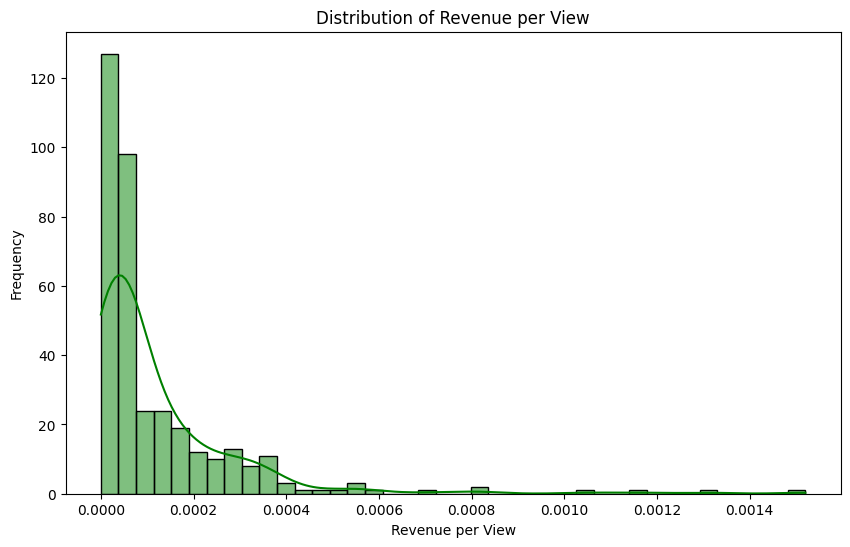

In [28]:
plt.figure(figsize=(10,6))
sns.histplot(df['Revenue per View'], bins=40, kde=True, color='green')
plt.title('Distribution of Revenue per View')
plt.xlabel('Revenue per View')
plt.ylabel('Frequency')
plt.show()


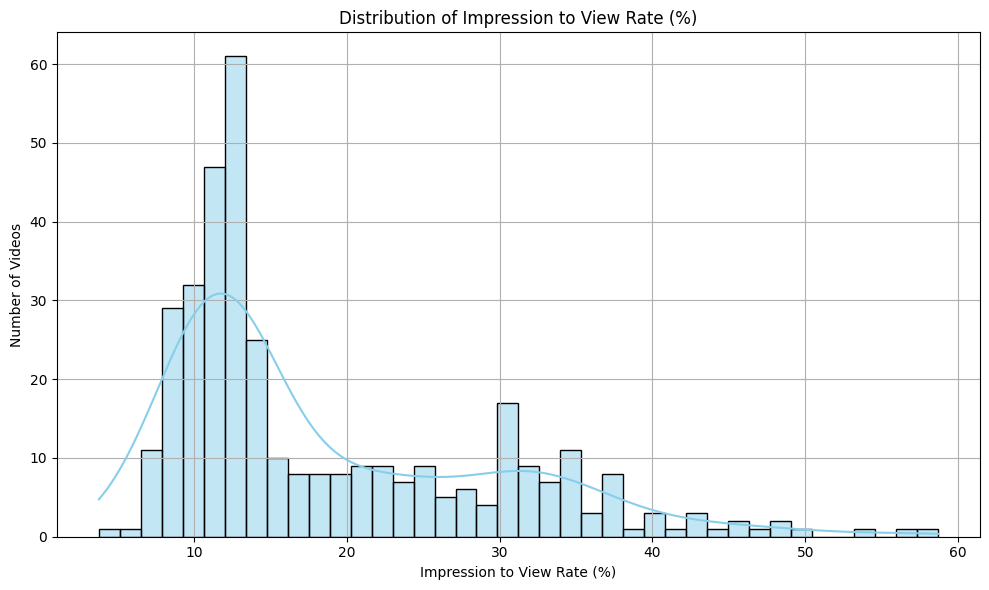

In [29]:
plt.figure(figsize=(10,6))
sns.histplot(df['Impression to View Rate (%)'], bins=40, kde=True, color='skyblue')
plt.title('Distribution of Impression to View Rate (%)')
plt.xlabel('Impression to View Rate (%)')
plt.ylabel('Number of Videos')
plt.grid(True)
plt.tight_layout()
plt.show()


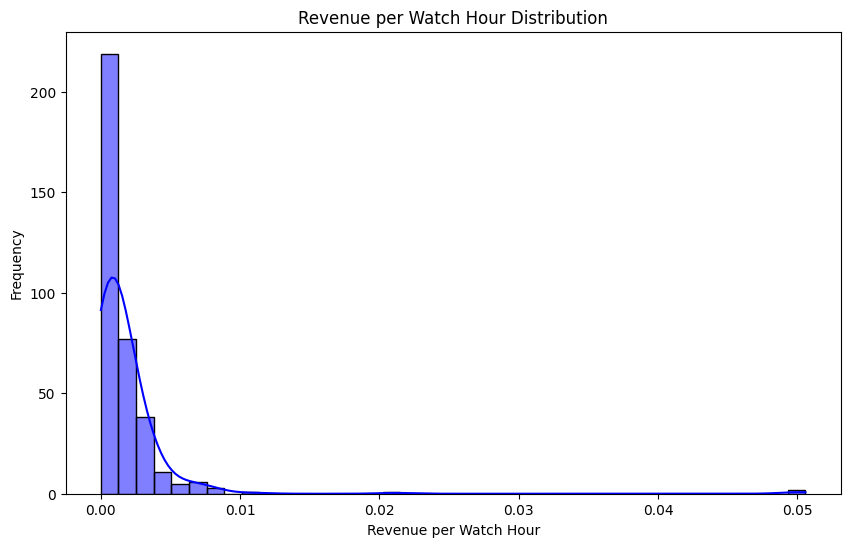

In [30]:
plt.figure(figsize=(10,6))
sns.histplot(df['Revenue per Watch Hour'], bins=40, kde=True, color='blue')
plt.title('Revenue per Watch Hour Distribution')
plt.xlabel('Revenue per Watch Hour')
plt.ylabel('Frequency')
plt.show()


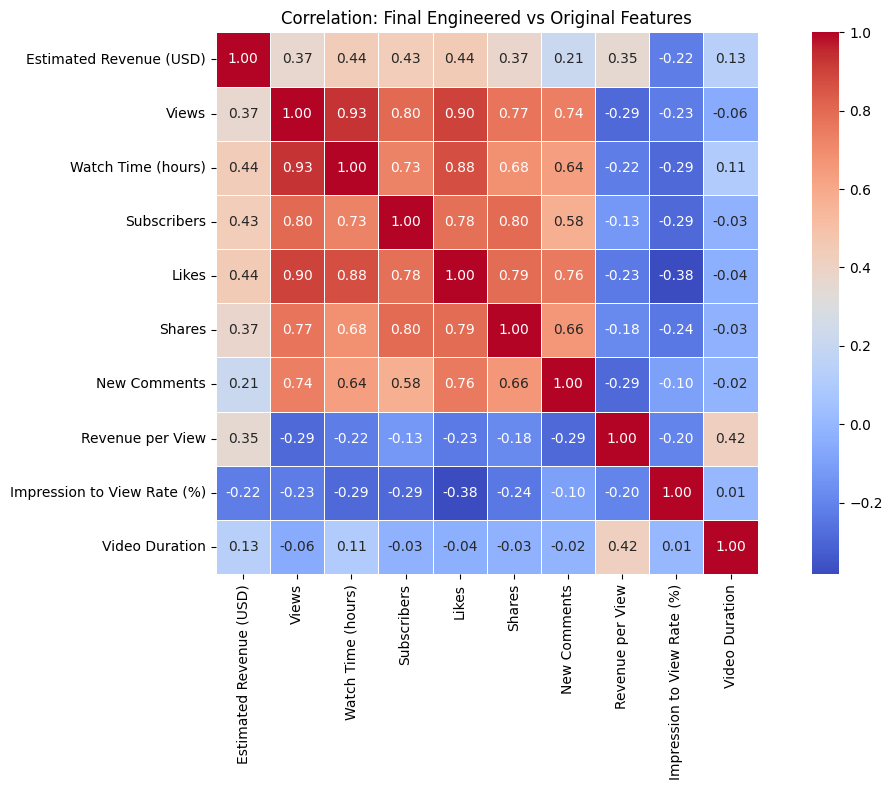

In [31]:

# Select original + engineered features for correlation analysis
correlation_features = [
    'Estimated Revenue (USD)', 'Views', 'Watch Time (hours)', 'Subscribers',
    'Likes', 'Shares', 'New Comments',
    'Revenue per View', 'Impression to View Rate (%)', 'Video Duration'
]

# Compute correlation matrix
corr_matrix = df[correlation_features].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, square=True)

plt.title('Correlation: Final Engineered vs Original Features')
plt.tight_layout()
plt.show()



MODEL BUILDING - A MULTI OUTPUT MODEL TO IDENTIFY WHICH FACTOR CONTRIBUTE TO CHANNEL REVENUE,SUBSCRIPTION GROWTH,AUDIENCE ENGAGEMENT

In [32]:
targets = ['Estimated Revenue (USD)', 'New Subscribers', 'Total Engagement']

# Step 3: Define Features (same or modified)
features = ['Views', 'Watch Time (hours)', 'Revenue per View', 
            'Video Duration', 'Impression to View Rate (%)']

# Step 4: Prepare X and Y
X = df[features]
Y = df[targets]

# Step 5: Train-test split for multi-target setup
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [33]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor

multi_model = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))
multi_model.fit(X_train, Y_train)
Y_pred = multi_model.predict(X_test)


In [34]:
from sklearn.metrics import mean_squared_error, r2_score

for i, target in enumerate(targets):
    mse = mean_squared_error(Y_test.iloc[:, i], Y_pred[:, i])
    r2 = r2_score(Y_test.iloc[:, i], Y_pred[:, i])
    print(f"{target} — MSE: {mse:.4f} | R² Score: {r2:.4f}")



Estimated Revenue (USD) — MSE: 4.7536 | R² Score: 0.9604
New Subscribers — MSE: 54766.6290 | R² Score: 0.6770
Total Engagement — MSE: 1780747.0222 | R² Score: 0.9149


FEATURE IMPORTANCE FOR REVENUE

 Top Features Driving Revenue:
                       Feature  Importance
2             Revenue per View    0.422794
1           Watch Time (hours)    0.284007
0                        Views    0.211205
4  Impression to View Rate (%)    0.067518
3               Video Duration    0.014475


C:\Users\Admin\AppData\Local\Temp\ipykernel_13988\3416606280.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=revenue_feat_imp, x='Importance', y='Feature', palette='Blues_d')


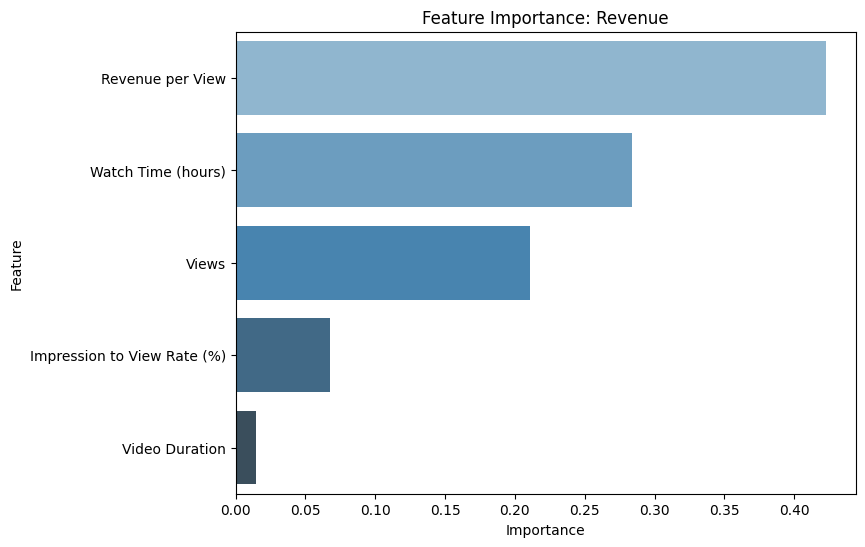

In [36]:
# Revenue prediction model (already trained)
revenue_model = multi_model.estimators_[0]  # First model predicts revenue

# Revenue feature importance
importances_rev = revenue_model.feature_importances_

revenue_feat_imp = pd.DataFrame({
    'Feature': features,
    'Importance': importances_rev
}).sort_values(by='Importance', ascending=False)

print(" Top Features Driving Revenue:")
print(revenue_feat_imp)

# Optional: Visualize
plt.figure(figsize=(8, 6))
sns.barplot(data=revenue_feat_imp, x='Importance', y='Feature', palette='Blues_d')
plt.title('Feature Importance: Revenue')
plt.show()


FEATURE IMPORTANCE FOR SUBSCRIBER GROWTH

 Top Features Driving Subscriber Growth:
                       Feature  Importance
0                        Views    0.717093
4  Impression to View Rate (%)    0.098319
1           Watch Time (hours)    0.079327
2             Revenue per View    0.060952
3               Video Duration    0.044310


C:\Users\Admin\AppData\Local\Temp\ipykernel_13988\3833076914.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subs_feat_imp, x='Importance', y='Feature', palette='Greens_d')


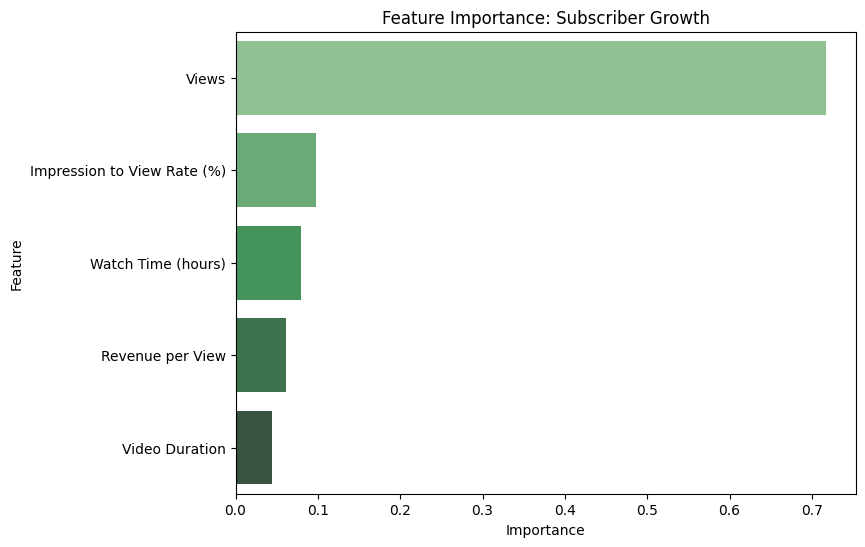

In [37]:
# Subscriber model (second in MultiOutput)
subs_model = multi_model.estimators_[1]

importances_subs = subs_model.feature_importances_

subs_feat_imp = pd.DataFrame({
    'Feature': features,
    'Importance': importances_subs
}).sort_values(by='Importance', ascending=False)

print(" Top Features Driving Subscriber Growth:")
print(subs_feat_imp)

# Optional: Visualize
plt.figure(figsize=(8, 6))
sns.barplot(data=subs_feat_imp, x='Importance', y='Feature', palette='Greens_d')
plt.title('Feature Importance: Subscriber Growth')
plt.show()


FEATURE IMPORTANCE FOR AUDIENCE ENGAGEMENT

 Top Features Driving Engagement:
                       Feature  Importance
1           Watch Time (hours)    0.488643
0                        Views    0.419067
4  Impression to View Rate (%)    0.051422
3               Video Duration    0.022965
2             Revenue per View    0.017902


C:\Users\Admin\AppData\Local\Temp\ipykernel_13988\94051466.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=engage_feat_imp, x='Importance', y='Feature', palette='Oranges_d')


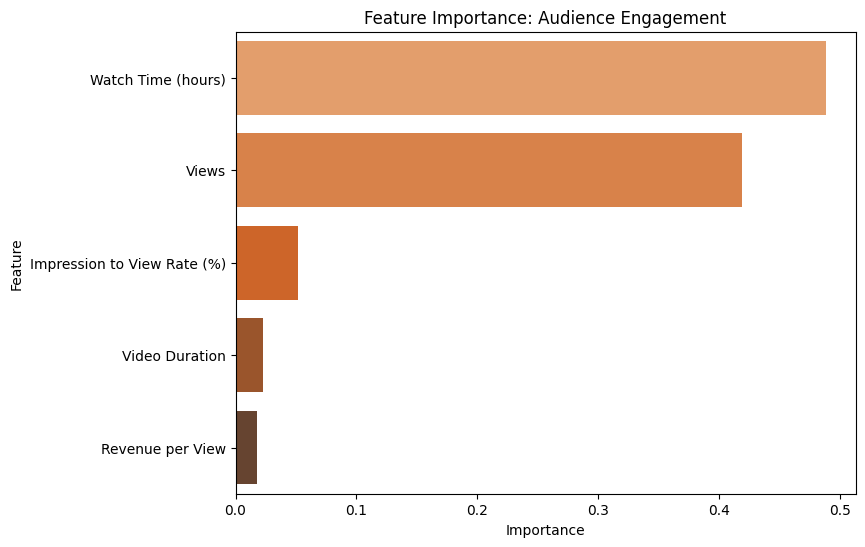

In [38]:
# Engagement model (third in MultiOutput)
engage_model = multi_model.estimators_[2]

importances_eng = engage_model.feature_importances_

engage_feat_imp = pd.DataFrame({
    'Feature': features,
    'Importance': importances_eng
}).sort_values(by='Importance', ascending=False)

print(" Top Features Driving Engagement:")
print(engage_feat_imp)

# Optional: Visualize
plt.figure(figsize=(8, 6))
sns.barplot(data=engage_feat_imp, x='Importance', y='Feature', palette='Oranges_d')
plt.title('Feature Importance: Audience Engagement')
plt.show()


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Final feature set for revenue
features = ['Views', 'Watch Time (hours)', 'Revenue per View', 
            'Video Duration', 'Impression to View Rate (%)']

target = 'Estimated Revenue (USD)'

# Prepare data
X = df[features]
y = df[target]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(f" Revenue Model R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"Revenue Model MSE: {mean_squared_error(y_test, y_pred):.4f}")



 Revenue Model R² Score: 0.9604
Revenue Model MSE: 4.7536


C:\Users\Admin\AppData\Local\Temp\ipykernel_13988\2759486977.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')


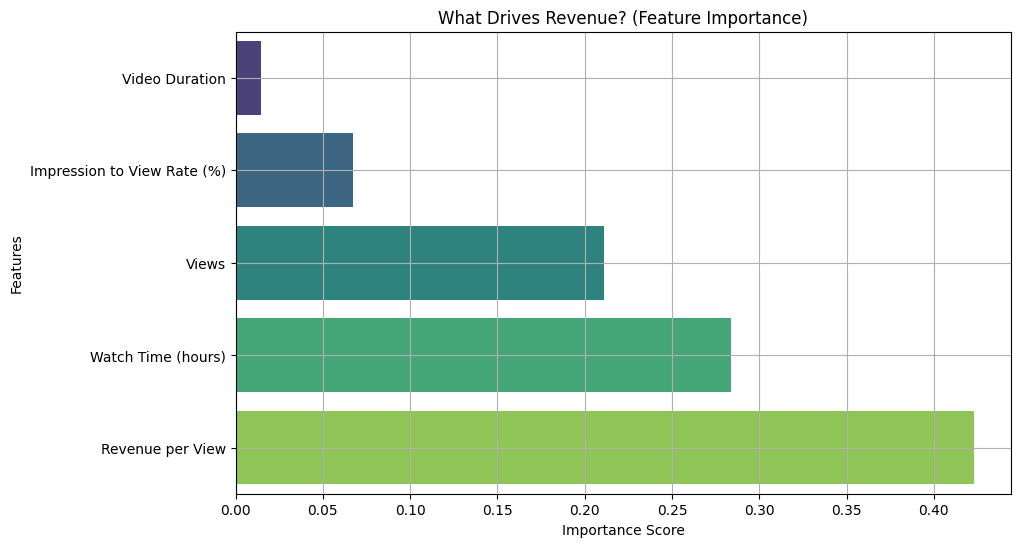

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importances
importances = model.feature_importances_
feat_imp_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_imp_df.sort_values(by='Importance', ascending=True, inplace=True)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')
plt.title('What Drives Revenue? (Feature Importance)')
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.grid(True)
plt.show()


PREDICTING ESTIMATED REVENUE

In [41]:
def predict_revenue(input_dict):
    input_df = pd.DataFrame([input_dict])
    return model.predict(input_df)[0]

# Example
sample_input = {
    'Views': 15000,
    'Watch Time (hours)': 700,
    'Revenue per View': 0.0004,
    'Video Duration': 600,
    'Impression to View Rate (%)': 25.0
}

predicted_revenue = predict_revenue(sample_input)
print(f" Predicted Estimated Revenue: ${predicted_revenue:.2f}")


 Predicted Estimated Revenue: $4.87


COMPARISON FOR ACTUAL VS PREDICTED

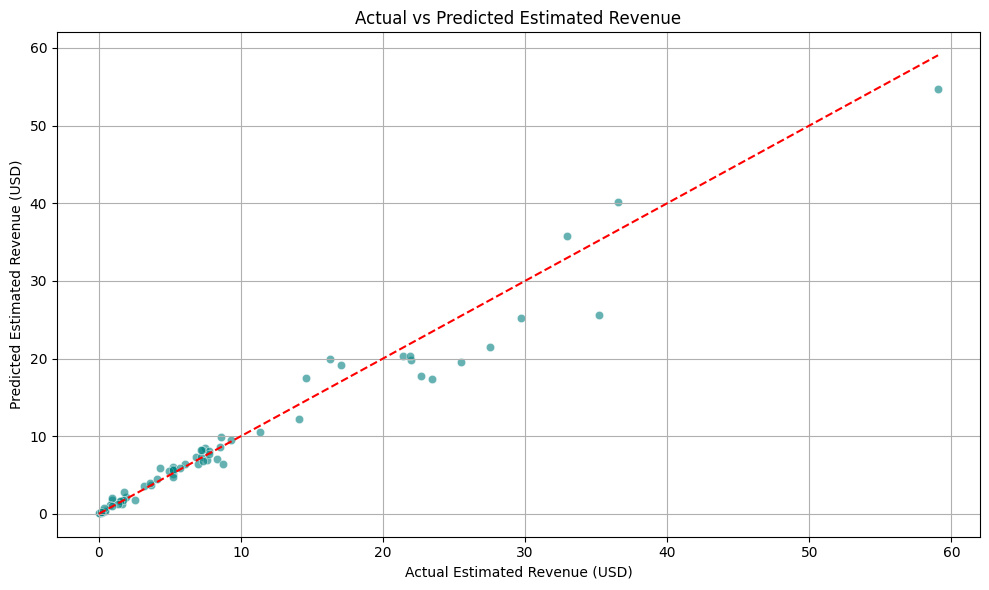

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='teal', alpha=0.6)

# Add a diagonal reference line (perfect prediction)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

# Labels and title
plt.xlabel("Actual Estimated Revenue (USD)")
plt.ylabel("Predicted Estimated Revenue (USD)")
plt.title("Actual vs Predicted Estimated Revenue")
plt.grid(True)
plt.tight_layout()
plt.show()


In [43]:
print(" Actionable Insights:")
top_features = feat_imp_df.sort_values(by='Importance', ascending=False)['Feature'].tolist()

if 'Revenue per View' in top_features[:2]:
    print("Focus on improving 'Revenue per View': Create longer, high-CPM content (tech, finance).")

if 'Watch Time (hours)' in top_features[:3]:
    print("Boost Watch Time: Use storytelling, CTAs, and retention hooks to increase viewer retention.")

if 'Impression to View Rate (%)' in top_features[:3]:
    print("Improve Thumbnails/Titles: Higher CTR can lead to more views and revenue.")

if 'Video Duration' in top_features:
    print("Optimize video length: Test content formats around top-performing durations.")

if 'Views' in top_features:
    print("Promote through SEO and community: More views = more monetization opportunities.")

 Actionable Insights:
Focus on improving 'Revenue per View': Create longer, high-CPM content (tech, finance).
Boost Watch Time: Use storytelling, CTAs, and retention hooks to increase viewer retention.
Optimize video length: Test content formats around top-performing durations.
Promote through SEO and community: More views = more monetization opportunities.
